# CID Report Group 4

Welcome!

This notebook is the interface to a little toolbox we wrote to run and analyze Mosaik simulations for this workshop.

For questions, troubleshooting and bugs please reach out to me (Ongun Türkcüoglu) via email: ongun.turkcuoglu@campus.tu-berlin.de 

Members of Group 4:
Carolin Brunn (Technische Universität Berlin)
Paul Ermler (Hasso-Plattner-Institut Potsdam)
Alexander Scharmann (Technische Universität Berlin)

In [2]:
from cid_mosaic import Mosaic

Initialize the toolbox using the absolute path to your Eclipse MOSAIC installation, i.e. `'/home/onqi/Documents/eclipse_mosaic'`.

In [3]:
mosaic = Mosaic('/home/oem/mosaic/eclipse-mosaic-21.0/')

The method `run_simulation()` will run the selected simulation and display the terminal output in the notebook.
If you set `visualize=True`, the Mosaic visualizer will open in a new tab.

# Simulation Settings and Functions
Here we define functions to set different parameters in the config files

In [4]:
"""
IMPORTS
"""

import json
import csv
import numpy as np
import pandas as pd
import time
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


In [5]:
"""
ENVIRONMENT PATHS
    set paths according to your environment
"""

scenario =  "/home/oem/mosaic/eclipse-mosaic-21.0/scenarios/Barnim/scenario_config.json"
network =   "/home/oem/mosaic/eclipse-mosaic-21.0/scenarios/Barnim/cell/network.json"
mapping = "/home/oem/mosaic/eclipse-mosaic-21.0/scenarios/Barnim/mapping/mapping_config.json"
sns = "/home/oem/mosaic/eclipse-mosaic-21.0/scenarios/Barnim/sns/sns_config.json"
logs = "/home/oem/mosaic/eclipse-mosaic-21.0/logs"
sim_path = "/home/oem/mosaic/eclipse-mosaic-21.0/scenarios/Barnim/Simulations/"


In [6]:
"""
FUNCTIONS TO HANDLE JSON FILES (automize simulation)
"""

# get JSON file
def getJson(filename): 
    a_file = open(filename, "r")
    json_object = json.load(a_file)
    a_file.close()
    return json_object

#####################

# write changes in JSON file
def dumpJson(filename, json_object):
    a_file = open(filename, "w")
    json.dump(json_object, a_file, indent=2)
    a_file.close()
    

In [7]:
"""
GENERAL SETTINGS FOR SIMULATION
"""

def initializeSim():
    filename = "/home/oem/mosaic/eclipse-mosaic-21.0/scenarios/Barnim/mapping/mapping_config.json"
    
    json_object = getJson(filename)
    json_object["prototypes"]["vehicleClass"] = "Car"
    json_object["vehicles"]["maxNumberVehicles"] = 300
    json_object["vehicles"]["spawningMode"] = "POISSON"
    
    dumpJson(filename, json_object)

#####################

# define how many cars perform cellular communication
def setPercentageOfCell(aPercentage):
    filename = mapping
    json_object = getJson(filename)
    json_object["vehicles"][0]["types"][0]["weight"] = aPercentage
    
    dumpJson(filename, json_object)

#####################

# define how many cars perform ad-hoc communication
def setPercentageOfWifi(aPercentage):
    filename = mapping
    json_object = getJson(filename)
    json_object["vehicles"][0]["types"][1]["weight"] = aPercentage
    
    dumpJson(filename, json_object)

#####################

# define how many cars perform cellular & ad-hoc communication
def setPercentageOfWifiAndCell(aPercentage):
    filename = mapping
    json_object = getJson(filename)
    json_object["vehicles"][0]["types"][2]["weight"] = aPercentage
    
    dumpJson(filename, json_object)


In [8]:
"""
GENERAL SETTINGS FOR CARS
"""

def setNumberOfCars(number):
    filename = mapping
    json_object = getJson(filename)
    json_object["vehicles"][0]["maxNumberVehicles"] = number
    
    dumpJson(filename, json_object)
    
#####################
    
def setSpawnMode():
    filename = mapping
    json_object = getJson(filename)
    json_object["vehicles"][0]["spawningMode"] = "CONSTANT"
    
    dumpJson(filename, json_object)
    
#####################

def setTargetFlow(f):
    filename = mapping
    json_object = getJson(filename)
    json_object["vehicles"][0]["targetFlow"] = f
    
    dumpJson(filename, json_object)

In [9]:
"""
SETTINGS FOR CELLULAR NETWORK
"""
# (de-) activate communication over cellular network
def setCell(boolean):
    #filename = "/home/oem/mosaic/eclipse-mosaic-21.0/scenarios/Barnim/scenario_config.json"
    filename = scenario
    json_object = getJson(filename)
    json_object["federates"]["cell"] = boolean
    
    dumpJson(filename, json_object)

#####################

# set loss probability for transmission in cellular comm
def setCellLossProb(p):
    #filename = "/home/oem/mosaic/eclipse-mosaic-21.0/scenarios/Barnim/cell/network.json"
    filename = network
    json_object = getJson(filename)
    json_object["globalNetwork"]["uplink"]["transmission"]["lossProbability"] = p
    json_object["globalNetwork"]["downlink"]["unicast"]["transmission"]["lossProbability"] = p
    json_object["globalNetwork"]["downlink"]["multicast"]["transmission"]["lossProbability"] = p
    
    dumpJson(filename, json_object)

#####################

# set up link capacity for transmission in cellular comm
def setUplinkCapacity(c):
    filename = network
    json_object = getJson(filename)
    json_object["globalNetwork"]["uplink"]["capacity"] = c
    
    dumpJson(filename, json_object)

#####################

# set down link capacity for transmission in cellular comm
def setDownlinkCapacity(c):
    filename = network
    json_object = getJson(filename)
    json_object["globalNetwork"]["downlink"]["capacity"] = c
    
    dumpJson(filename, json_object)

#####################

# set nr. of retries for transmission in cellular comm
def setRetriesCell(r):
    filename = network
    json_object = getJson(filename)
    json_object["globalNetwork"]["uplink"]["transmission"]["maxRetries"] = r
    json_object["globalNetwork"]["downlink"]["unicast"]["transmission"]["maxRetries"] = r
    json_object["globalNetwork"]["downlink"]["multicast"]["transmission"]["maxRetries"] = r
    
    dumpJson(filename, json_object)



In [10]:
"""
SETTINGS FOR AD-HOC NETWORK
"""

# (de-) activate communication over ad-hoc network
def setSNS(boolean):
    #filename = "/home/oem/mosaic/eclipse-mosaic-21.0/scenarios/Barnim/scenario_config.json"
    filename = scenario
    json_object = getJson(filename)
    json_object["federates"]["sns"] = boolean
    
    dumpJson(filename, json_object)
    
#####################

# set TTL in ad-hoc nw
def setSnsTtl(ttl):
    #filename = "/home/oem/mosaic/eclipse-mosaic-21.0/scenarios/Barnim/sns/sns_config.json"
    filename = sns
    json_object = getJson(filename)
    json_object["maximumTtl"] = ttl
    
    dumpJson(filename, json_object)

#####################

# set loss prob for transmission in ad-hoc nw
def setSnsLossProb(p):
    #filename = "/home/oem/mosaic/eclipse-mosaic-21.0/scenarios/Barnim/sns/sns_config.json"
    filename = sns
    json_object = getJson(filename)
    json_object["singlehopTransmission"]["lossProbability"] = p
    
    dumpJson(filename, json_object)
    
def setSinglehopRadius(r):
    filename = sns
    json_object = getJson(filename)
    json_object["singlehopRadius"] = r
    
    dumpJson(filename, json_object)

In [11]:
"""
DELETE SIMULATION LOGS
"""
def deleteAllLogs():
    folder = logs
    for filename in os.listdir(folder):
        file_path = os.path.join(folder, filename)
        try:
            if os.path.isfile(file_path) or os.path.islink(file_path):
                os.unlink(file_path)
            elif os.path.isdir(file_path):
                shutil.rmtree(file_path)
        except Exception as e:
            print('Failed to delete %s. Reason: %s' % (file_path, e))

# Baseline

In [12]:
setTargetFlow(0)

In [13]:
def baseline():
    setPercentageOfCell(0.5)
    setPercentageOfWifi(0.5)
    setPercentageOfWifiAndCell(0)

    setCell(True)
    setSNS(True)
    setRetriesCell(0)
    
    setUplinkCapacity(28000000)
    setDownlinkCapacity(42200000)

    setNumberOfCars(300)
    setSpawnMode()
    setTargetFlow(1800)

In [14]:
baseline()

# Simulations with both, ad hoc and cellular communication

In [36]:
"""
Ad-Hoc + Cellular Simulation:
    vary percentage of cars with communication ability
    vary TTL
    vary number of retries
    vary loss probability 
"""

baseline()

# set simulation parameters
noCars = 300
setNumberOfCars(noCars)
radius = 400
setSinglehopRadius(radius)
targetFlow = 1800
setTargetFlow(targetFlow)

# different parameter settings for number of cars with ad-hoc/cell antenna, loss prob, ttl, retries
l_communication_percentage = np.arange(0, 1, 0.4)
l_TTL = [3, 10] 
l_retries = [1, 8]
l_lossp = np.arange(0, 1, 0.4)

# set simulation name
nw_type = "ad-hoc+cell"
sim_name = "cell_adHoc" + "_r" + str(radius) + "_ncars" + str(noCars) + "_varyPercentageLosspTtlRetries"

# initialize dictionary to save simulation data
sim_data = {"network type": [],
            "comm percentage": [],
            "loss p": [],
            "TTL": [],
            "retries": [],
            "hop radius": [],
            "standard route": [],
            "alternative route": [], 
            "CO2": []}

In [22]:
# simulate varying percentage of ad-hoc or cellular vehicles
for percentage in l_communication_percentage:
    
    setPercentageOfWifiAndCell(percentage)
    setPercentageOfWifi((1-percentage)/2)
    setPercentageOfCell((1-percentage)/2)
    
    # simulate varying TTL
    for ttl in l_TTL:
        setSnsTtl(ttl)
        
        # simulate varying number of retries
        for ret in l_retries:
            setRetriesCell(ret)
    
            # simulate varying loss prob 
            for p in l_lossp:
                print("percentage (both): ", percentage," TTL: ", ttl, " retries: ", ret, " loss p: ", p)

                # set loss probability in ad-hoc & cellular nw
                setSnsLossProb(p)
                setCellLossProb(p)

                # run simulation
                mosaic.run_simulation(visualize=False)
                res = mosaic.eval_simulation()

                # write data to dictionary
                sim_data["network type"].append(nw_type)
                sim_data["comm percentage"].append(percentage)
                sim_data["loss p"].append(p)
                sim_data["TTL"].append(ttl)
                sim_data["retries"].append(ret)
                sim_data["hop radius"].append(radius)
                sim_data["standard route"].append(res[0])
                sim_data["alternative route"].append(res[1])
                sim_data["CO2"].append(res[2])

                # delete all log files
                deleteAllLogs()

# convert dict with simulation data to df to csv 
df = pd.DataFrame(data = sim_data, columns = sim_data.keys())

# save data for further processing
df.to_csv(sim_path + sim_name + ".csv" )


both:  0.0  one:  0.5
percentage:  0.0  TTL:  3  retries:  1  loss p:  0.0
Running: ./mosaic.sh -s Barnim
2021-07-30 08:13:02,813 INFO  ROOT - Running Eclipse MOSAIC 21.0 on Java JRE v16.0.1 (AdoptOpenJDK)
2021-07-30 08:13:03,068 INFO  FederationManagement - Start federation with id 'Barnim'
2021-07-30 08:13:03,070 INFO  FederationManagement - Add ambassador/federate with id 'application'
2021-07-30 08:13:03,071 INFO  FederationManagement - Add ambassador/federate with id 'environment'
2021-07-30 08:13:03,071 INFO  FederationManagement - Add ambassador/federate with id 'mapping'
2021-07-30 08:13:03,072 INFO  FederationManagement - Add ambassador/federate with id 'cell'
2021-07-30 08:13:03,072 INFO  FederationManagement - Add ambassador/federate with id 'sns'
2021-07-30 08:13:03,072 INFO  FederationManagement - Add ambassador/federate with id 'sumo'
2021-07-30 08:13:03,072 INFO  FederationManagement - Deploying federate 'sumo' locally in ./tmp/sumo
2021-07-30 08:13:03,082 INFO  Federati

<ipython-input-22-4e840d65cdf6>:27: DtypeWarning: Columns (3,5,6,7,10) have mixed types.Specify dtype option on import or set low_memory=False.
  res = mosaic.eval_simulation()


173 vehicles took the standard route
127 vehicles took the alternate route
On average a vehicle released 1471.21 g CO2
percentage:  0.0  TTL:  3  retries:  1  loss p:  0.4
Running: ./mosaic.sh -s Barnim
2021-07-30 08:14:03,412 INFO  ROOT - Running Eclipse MOSAIC 21.0 on Java JRE v16.0.1 (AdoptOpenJDK)
2021-07-30 08:14:03,668 INFO  FederationManagement - Start federation with id 'Barnim'
2021-07-30 08:14:03,669 INFO  FederationManagement - Add ambassador/federate with id 'application'
2021-07-30 08:14:03,671 INFO  FederationManagement - Add ambassador/federate with id 'environment'
2021-07-30 08:14:03,671 INFO  FederationManagement - Add ambassador/federate with id 'mapping'
2021-07-30 08:14:03,671 INFO  FederationManagement - Add ambassador/federate with id 'cell'
2021-07-30 08:14:03,671 INFO  FederationManagement - Add ambassador/federate with id 'sns'
2021-07-30 08:14:03,671 INFO  FederationManagement - Add ambassador/federate with id 'sumo'
2021-07-30 08:14:03,671 INFO  FederationMa

<ipython-input-22-4e840d65cdf6>:27: DtypeWarning: Columns (3,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  res = mosaic.eval_simulation()


173 vehicles took the standard route
127 vehicles took the alternate route
On average a vehicle released 1477.76 g CO2
percentage:  0.0  TTL:  3  retries:  1  loss p:  0.8
Running: ./mosaic.sh -s Barnim
2021-07-30 08:15:02,272 INFO  ROOT - Running Eclipse MOSAIC 21.0 on Java JRE v16.0.1 (AdoptOpenJDK)
2021-07-30 08:15:02,599 INFO  FederationManagement - Start federation with id 'Barnim'
2021-07-30 08:15:02,599 INFO  FederationManagement - Add ambassador/federate with id 'application'
2021-07-30 08:15:02,600 INFO  FederationManagement - Add ambassador/federate with id 'environment'
2021-07-30 08:15:02,600 INFO  FederationManagement - Add ambassador/federate with id 'mapping'
2021-07-30 08:15:02,600 INFO  FederationManagement - Add ambassador/federate with id 'cell'
2021-07-30 08:15:02,601 INFO  FederationManagement - Add ambassador/federate with id 'sns'
2021-07-30 08:15:02,601 INFO  FederationManagement - Add ambassador/federate with id 'sumo'
2021-07-30 08:15:02,601 INFO  FederationMa

118 vehicles took the standard route
182 vehicles took the alternate route
On average a vehicle released 1439.73 g CO2
percentage:  0.0  TTL:  10  retries:  1  loss p:  0.8
Running: ./mosaic.sh -s Barnim
2021-07-30 08:20:10,350 INFO  ROOT - Running Eclipse MOSAIC 21.0 on Java JRE v16.0.1 (AdoptOpenJDK)
2021-07-30 08:20:10,625 INFO  FederationManagement - Start federation with id 'Barnim'
2021-07-30 08:20:10,630 INFO  FederationManagement - Add ambassador/federate with id 'application'
2021-07-30 08:20:10,631 INFO  FederationManagement - Add ambassador/federate with id 'environment'
2021-07-30 08:20:10,631 INFO  FederationManagement - Add ambassador/federate with id 'mapping'
2021-07-30 08:20:10,632 INFO  FederationManagement - Add ambassador/federate with id 'cell'
2021-07-30 08:20:10,632 INFO  FederationManagement - Add ambassador/federate with id 'sns'
2021-07-30 08:20:10,632 INFO  FederationManagement - Add ambassador/federate with id 'sumo'
2021-07-30 08:20:10,632 INFO  FederationM

123 vehicles took the standard route
177 vehicles took the alternate route
On average a vehicle released 1428.71 g CO2
percentage:  0.4  TTL:  3  retries:  1  loss p:  0.8
Running: ./mosaic.sh -s Barnim
2021-07-30 08:24:47,258 INFO  ROOT - Running Eclipse MOSAIC 21.0 on Java JRE v16.0.1 (AdoptOpenJDK)
2021-07-30 08:24:47,509 INFO  FederationManagement - Start federation with id 'Barnim'
2021-07-30 08:24:47,518 INFO  FederationManagement - Add ambassador/federate with id 'application'
2021-07-30 08:24:47,519 INFO  FederationManagement - Add ambassador/federate with id 'environment'
2021-07-30 08:24:47,519 INFO  FederationManagement - Add ambassador/federate with id 'mapping'
2021-07-30 08:24:47,520 INFO  FederationManagement - Add ambassador/federate with id 'cell'
2021-07-30 08:24:47,520 INFO  FederationManagement - Add ambassador/federate with id 'sns'
2021-07-30 08:24:47,520 INFO  FederationManagement - Add ambassador/federate with id 'sumo'
2021-07-30 08:24:47,520 INFO  FederationMa

113 vehicles took the standard route
187 vehicles took the alternate route
On average a vehicle released 1361.66 g CO2
percentage:  0.4  TTL:  10  retries:  1  loss p:  0.8
Running: ./mosaic.sh -s Barnim
2021-07-30 08:29:33,266 INFO  ROOT - Running Eclipse MOSAIC 21.0 on Java JRE v16.0.1 (AdoptOpenJDK)
2021-07-30 08:29:33,650 INFO  FederationManagement - Start federation with id 'Barnim'
2021-07-30 08:29:33,662 INFO  FederationManagement - Add ambassador/federate with id 'application'
2021-07-30 08:29:33,663 INFO  FederationManagement - Add ambassador/federate with id 'environment'
2021-07-30 08:29:33,663 INFO  FederationManagement - Add ambassador/federate with id 'mapping'
2021-07-30 08:29:33,664 INFO  FederationManagement - Add ambassador/federate with id 'cell'
2021-07-30 08:29:33,664 INFO  FederationManagement - Add ambassador/federate with id 'sns'
2021-07-30 08:29:33,664 INFO  FederationManagement - Add ambassador/federate with id 'sumo'
2021-07-30 08:29:33,664 INFO  FederationM

120 vehicles took the standard route
180 vehicles took the alternate route
On average a vehicle released 1374.65 g CO2
percentage:  0.8  TTL:  3  retries:  1  loss p:  0.8
Running: ./mosaic.sh -s Barnim
2021-07-30 08:34:26,528 INFO  ROOT - Running Eclipse MOSAIC 21.0 on Java JRE v16.0.1 (AdoptOpenJDK)
2021-07-30 08:34:26,859 INFO  FederationManagement - Start federation with id 'Barnim'
2021-07-30 08:34:26,862 INFO  FederationManagement - Add ambassador/federate with id 'application'
2021-07-30 08:34:26,863 INFO  FederationManagement - Add ambassador/federate with id 'environment'
2021-07-30 08:34:26,863 INFO  FederationManagement - Add ambassador/federate with id 'mapping'
2021-07-30 08:34:26,863 INFO  FederationManagement - Add ambassador/federate with id 'cell'
2021-07-30 08:34:26,863 INFO  FederationManagement - Add ambassador/federate with id 'sns'
2021-07-30 08:34:26,863 INFO  FederationManagement - Add ambassador/federate with id 'sumo'
2021-07-30 08:34:26,863 INFO  FederationMa

115 vehicles took the standard route
185 vehicles took the alternate route
On average a vehicle released 1371.14 g CO2
percentage:  0.8  TTL:  10  retries:  1  loss p:  0.8
Running: ./mosaic.sh -s Barnim
2021-07-30 08:39:34,001 INFO  ROOT - Running Eclipse MOSAIC 21.0 on Java JRE v16.0.1 (AdoptOpenJDK)
2021-07-30 08:39:34,260 INFO  FederationManagement - Start federation with id 'Barnim'
2021-07-30 08:39:34,261 INFO  FederationManagement - Add ambassador/federate with id 'application'
2021-07-30 08:39:34,262 INFO  FederationManagement - Add ambassador/federate with id 'environment'
2021-07-30 08:39:34,263 INFO  FederationManagement - Add ambassador/federate with id 'mapping'
2021-07-30 08:39:34,263 INFO  FederationManagement - Add ambassador/federate with id 'cell'
2021-07-30 08:39:34,263 INFO  FederationManagement - Add ambassador/federate with id 'sns'
2021-07-30 08:39:34,263 INFO  FederationManagement - Add ambassador/federate with id 'sumo'
2021-07-30 08:39:34,263 INFO  FederationM

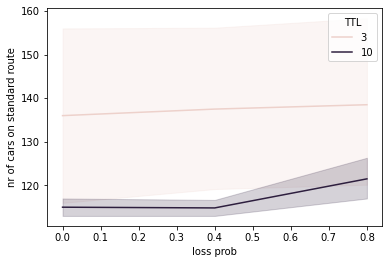

In [37]:

# load data for ad-hoc simulation
df_name = sim_path + sim_name + ".csv"
df = pd.read_csv(df_name, sep = ",")

# plot number of cars on standard route
# for cellular parameter: change TTL to retries
sb.lineplot(data = df, x = "loss p", y = "standard route", hue = "TTL")
plt.ylabel("nr of cars on standard route")
plt.xlabel("loss prob")
plt.show()


More cars take the alternative route if the TTL increases.

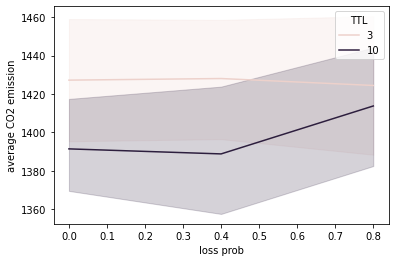

In [38]:

# plot average CO2 emission
# for cellular parameter: change TTL to retries
sb.lineplot(data = df, x = "loss p", y = "CO2", hue = "TTL")
plt.ylabel("average CO2 emission")
plt.xlabel("loss prob")
plt.show()


This also leads to a reduced CO2 emission.

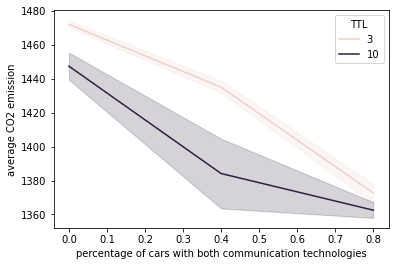

In [39]:
# plot average CO2 emission
# for cellular parameter: change TTL to retries
sb.lineplot(data = df, x = "comm percentage", y = "CO2", hue = "TTL") # STANDARD ROUTE???
plt.ylabel("average CO2 emission")
plt.xlabel("percentage of cars with both communication technologies")
plt.show()

# Simulations with ad hoc communication

Simulation to investigate the influence of percentage of cars with ad hoc technology, TTL, and loss probability

In [28]:
"""
Ad-Hoc Simulation:
    vary percentage of cars with communication ability
    vary TTL
    vary loss probability 
"""
baseline()

# set corresponding boolean in scenario.config
setSNS(True)
setCell(False)
setPercentageOfWifi(1)
setPercentageOfCell(0)
setPercentageOfWifiAndCell(0)

# set simulation parameters
ncars = 300
setNumberOfCars(ncars)
radius = 400
setSinglehopRadius(radius)
flow = 1800
setTargetFlow(flow)

# set simulation name
nw_type = "ad-hoc"
sim_name = "ad_hoc_simulation" + "_ncars" + str(noCars) + "_varyPercTtlLossp"

# different parameter settings for no of cars with ad-hoc antenna, loss prob, ttl
l_percentage = np.arange(0, 1, 0.5)
l_lossp = np.arange(0, 1, 0.4)
l_TTL = range(1, 11, 2) #[3, 10]

# initialize dictionary to save simulation data   
sim_data = {"network type": [],
            "ncars": [],
            "comm percentage": [],
            "loss p": [],
            "TTL": [],
            "hop radius": [],
            "target flow": [],
            "standard route": [],
            "alternative route": [], 
            "CO2": []}

In [29]:
### RUN SIMULATION
# vary percentage of cars with ad-hoc comm possibility
for percentage in l_percentage:
    setPercentageOfWifi(percentage)

    # simulate varying TTL
    for ttl in l_TTL:
        setSnsTtl(ttl)

        # simulate varying loss probability
        for p in l_lossp:
            print("percentage (ad hoc): ", percentage," TTL: ", ttl, " loss p: ", p)

            # set loss probability in ad-hoc nw
            setSnsLossProb(p)

            # run simulation
            mosaic.run_simulation(visualize=False)
            res = mosaic.eval_simulation()

            # write data to dictionary
            sim_data["network type"].append(nw_type)
            sim_data["ncars"].append(ncars)
            sim_data["comm percentage"].append(percentage)
            sim_data["loss p"].append(p)
            sim_data["TTL"].append(ttl)
            sim_data["hop radius"].append(radius)
            sim_data["target flow"].append(flow)
            sim_data["standard route"].append(res[0])
            sim_data["alternative route"].append(res[1])
            sim_data["CO2"].append(res[2])

            # delete log files
            deleteAllLogs()

# convert dict with simulation data to df to csv 
df = pd.DataFrame(data = sim_data, columns = sim_data.keys())

# save for further processing
df.to_csv(sim_path + sim_name + ".csv" )

percentage:  0.0  TTL:  3  loss p:  0.0
Running: ./mosaic.sh -s Barnim
2021-07-30 08:45:30,081 INFO  ROOT - Running Eclipse MOSAIC 21.0 on Java JRE v16.0.1 (AdoptOpenJDK)
2021-07-30 08:45:30,216 INFO  FederationManagement - Start federation with id 'Barnim'
2021-07-30 08:45:30,217 INFO  FederationManagement - Add ambassador/federate with id 'application'
2021-07-30 08:45:30,218 INFO  FederationManagement - Add ambassador/federate with id 'environment'
2021-07-30 08:45:30,218 INFO  FederationManagement - Add ambassador/federate with id 'mapping'
2021-07-30 08:45:30,218 INFO  FederationManagement - Add ambassador/federate with id 'sns'
2021-07-30 08:45:30,218 INFO  FederationManagement - Add ambassador/federate with id 'sumo'
2021-07-30 08:45:30,218 INFO  FederationManagement - Deploying federate 'sumo' locally in ./tmp/sumo
2021-07-30 08:45:30,227 INFO  FederationManagement - Starting federate 'sumo' locally in ./tmp/sumo
2021-07-30 08:45:30,227 INFO  FederationManagement - Add ambassad

<ipython-input-29-1a2c0d8f60fe>:19: DtypeWarning: Columns (3,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  res = mosaic.eval_simulation()


300 vehicles took the standard route
0 vehicles took the alternate route
On average a vehicle released 1521.91 g CO2
percentage:  0.0  TTL:  3  loss p:  0.4
Running: ./mosaic.sh -s Barnim
2021-07-30 08:46:33,401 INFO  ROOT - Running Eclipse MOSAIC 21.0 on Java JRE v16.0.1 (AdoptOpenJDK)
2021-07-30 08:46:33,658 INFO  FederationManagement - Start federation with id 'Barnim'
2021-07-30 08:46:33,666 INFO  FederationManagement - Add ambassador/federate with id 'application'
2021-07-30 08:46:33,667 INFO  FederationManagement - Add ambassador/federate with id 'environment'
2021-07-30 08:46:33,667 INFO  FederationManagement - Add ambassador/federate with id 'mapping'
2021-07-30 08:46:33,667 INFO  FederationManagement - Add ambassador/federate with id 'sns'
2021-07-30 08:46:33,668 INFO  FederationManagement - Add ambassador/federate with id 'sumo'
2021-07-30 08:46:33,668 INFO  FederationManagement - Deploying federate 'sumo' locally in ./tmp/sumo
2021-07-30 08:46:33,676 INFO  FederationManageme

<ipython-input-29-1a2c0d8f60fe>:19: DtypeWarning: Columns (3,5,6,7,10) have mixed types.Specify dtype option on import or set low_memory=False.
  res = mosaic.eval_simulation()


220 vehicles took the standard route
80 vehicles took the alternate route
On average a vehicle released 1478.10 g CO2
percentage:  0.0  TTL:  10  loss p:  0.4
Running: ./mosaic.sh -s Barnim
2021-07-30 08:49:01,486 INFO  ROOT - Running Eclipse MOSAIC 21.0 on Java JRE v16.0.1 (AdoptOpenJDK)
2021-07-30 08:49:01,691 INFO  FederationManagement - Start federation with id 'Barnim'
2021-07-30 08:49:01,691 INFO  FederationManagement - Add ambassador/federate with id 'application'
2021-07-30 08:49:01,692 INFO  FederationManagement - Add ambassador/federate with id 'environment'
2021-07-30 08:49:01,692 INFO  FederationManagement - Add ambassador/federate with id 'mapping'
2021-07-30 08:49:01,692 INFO  FederationManagement - Add ambassador/federate with id 'sns'
2021-07-30 08:49:01,693 INFO  FederationManagement - Add ambassador/federate with id 'sumo'
2021-07-30 08:49:01,693 INFO  FederationManagement - Deploying federate 'sumo' locally in ./tmp/sumo
2021-07-30 08:49:01,702 INFO  FederationManage

134 vehicles took the standard route
166 vehicles took the alternate route
On average a vehicle released 1434.72 g CO2
percentage:  0.5  TTL:  10  loss p:  0.4
Running: ./mosaic.sh -s Barnim
2021-07-30 08:59:27,385 INFO  ROOT - Running Eclipse MOSAIC 21.0 on Java JRE v16.0.1 (AdoptOpenJDK)
2021-07-30 08:59:27,724 INFO  FederationManagement - Start federation with id 'Barnim'
2021-07-30 08:59:27,725 INFO  FederationManagement - Add ambassador/federate with id 'application'
2021-07-30 08:59:27,726 INFO  FederationManagement - Add ambassador/federate with id 'environment'
2021-07-30 08:59:27,726 INFO  FederationManagement - Add ambassador/federate with id 'mapping'
2021-07-30 08:59:27,726 INFO  FederationManagement - Add ambassador/federate with id 'sns'
2021-07-30 08:59:27,726 INFO  FederationManagement - Add ambassador/federate with id 'sumo'
2021-07-30 08:59:27,726 INFO  FederationManagement - Deploying federate 'sumo' locally in ./tmp/sumo
2021-07-30 08:59:27,737 INFO  FederationManag

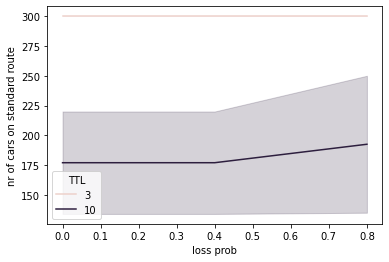

In [32]:
# load data for ad-hoc simulation
df_name = sim_path + sim_name + ".csv"
df = pd.read_csv(df_name, sep = ",")

# plot number of cars on standard route
sb.lineplot(data = df, x = "loss p", y = "standard route", hue = "TTL")
plt.ylabel("nr of cars on standard route")
plt.xlabel("loss prob")
plt.show()


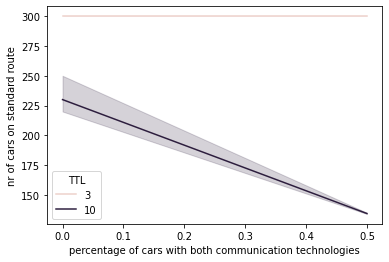

In [33]:
# plot number of cars on standard route
sb.lineplot(data = df, x = "comm percentage", y = "standard route", hue = "TTL")
plt.ylabel("nr of cars on standard route")
plt.xlabel("percentage of cars with both communication technologies")
plt.show()

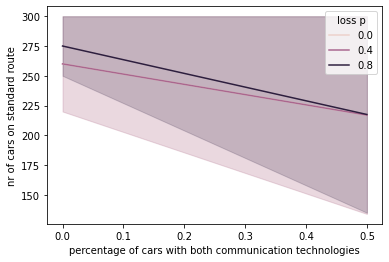

In [34]:
# plot number of cars on standard route
sb.lineplot(data = df, x = "comm percentage", y = "standard route", hue = "loss p")
plt.ylabel("nr of cars on standard route")
plt.xlabel("percentage of cars with both communication technologies")
plt.show()

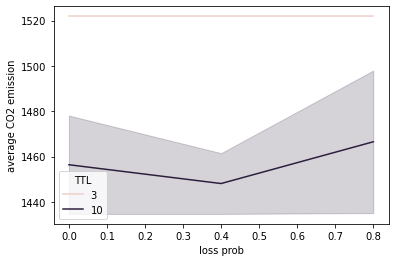

In [35]:

# plot average CO2 emission
sb.lineplot(data = df, x = "loss p", y = "CO2", hue = "TTL")
plt.ylabel("average CO2 emission")
plt.xlabel("loss prob")
plt.show()


Simulation to investigate the influence of single hop radius, and target flow

In [43]:
"""
Ad-Hoc Simulation:
    vary single hop radius
    vary flow
"""
baseline()

# set corresponding boolean in scenario.config
setSNS(True)
setCell(False)
percentage = 1
setPercentageOfWifi(percentage)
setPercentageOfCell(0)
setPercentageOfWifiAndCell(0)

# set simulation parameters
ncars = 300
setNumberOfCars(ncars)
TTL = 8
setSnsTtl(TTL)
# set loss probability in ad-hoc nw
p = 0
setSnsLossProb(p)

# set simulation name
nw_type = "ad-hoc"
sim_name = "ad_hoc_simulation" + "_ncars" + str(noCars) + "_varyFlowRadius"

# different parameter settings for no of cars with ad-hoc antenna, loss prob, ttl
l_radius = [100, 400, 800, 1200] #[400, 1200]
l_flows = [1000,1200,1400,1600,1800,2000,2200,2400,2600] #[1000, 1800, 2600]

# initialize dictionary to save simulation data   
sim_data = {"network type": [],
            "ncars": [],
            "comm percentage": [],
            "loss p": [],
            "TTL": [],
            "hop radius": [],
            "target flow": [],
            "standard route": [],
            "alternative route": [], 
            "CO2": []}

In [44]:
### RUN SIMULATION

# simulate varying TTL
for flow in l_flows:
    setTargetFlow(flow)

    # simulate varying singlehop radius
    for radius in l_radius:
        setSinglehopRadius(radius)

        print("flow: ", flow," radius: ", radius)

        # run simulation
        mosaic.run_simulation(visualize=False)
        res = mosaic.eval_simulation()

        # write data to dictionary
        sim_data["network type"].append(nw_type)
        sim_data["ncars"].append(ncars)
        sim_data["comm percentage"].append(percentage)
        sim_data["loss p"].append(p)
        sim_data["TTL"].append(ttl)
        sim_data["hop radius"].append(radius)
        sim_data["target flow"].append(flow)
        sim_data["standard route"].append(res[0])
        sim_data["alternative route"].append(res[1])
        sim_data["CO2"].append(res[2])

        # delete log files
        deleteAllLogs()

# convert dict with simulation data to df to csv 
df = pd.DataFrame(data = sim_data, columns = sim_data.keys())

# save for further processing
df.to_csv(sim_path + sim_name + ".csv" )

flow:  1000  radius:  400
Running: ./mosaic.sh -s Barnim
2021-07-30 09:09:01,737 INFO  ROOT - Running Eclipse MOSAIC 21.0 on Java JRE v16.0.1 (AdoptOpenJDK)
2021-07-30 09:09:01,912 INFO  FederationManagement - Start federation with id 'Barnim'
2021-07-30 09:09:01,913 INFO  FederationManagement - Add ambassador/federate with id 'application'
2021-07-30 09:09:01,914 INFO  FederationManagement - Add ambassador/federate with id 'environment'
2021-07-30 09:09:01,914 INFO  FederationManagement - Add ambassador/federate with id 'mapping'
2021-07-30 09:09:01,914 INFO  FederationManagement - Add ambassador/federate with id 'sns'
2021-07-30 09:09:01,914 INFO  FederationManagement - Add ambassador/federate with id 'sumo'
2021-07-30 09:09:01,915 INFO  FederationManagement - Deploying federate 'sumo' locally in ./tmp/sumo
2021-07-30 09:09:01,926 INFO  FederationManagement - Starting federate 'sumo' locally in ./tmp/sumo
2021-07-30 09:09:01,926 INFO  FederationManagement - Add ambassador/federate wi

<ipython-input-44-5875fbcadf9c>:15: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  res = mosaic.eval_simulation()


147 vehicles took the standard route
130 vehicles took the alternate route
On average a vehicle released 1069.03 g CO2
flow:  1000  radius:  1200
Running: ./mosaic.sh -s Barnim
2021-07-30 09:09:35,219 INFO  ROOT - Running Eclipse MOSAIC 21.0 on Java JRE v16.0.1 (AdoptOpenJDK)
2021-07-30 09:09:35,467 INFO  FederationManagement - Start federation with id 'Barnim'
2021-07-30 09:09:35,468 INFO  FederationManagement - Add ambassador/federate with id 'application'
2021-07-30 09:09:35,468 INFO  FederationManagement - Add ambassador/federate with id 'environment'
2021-07-30 09:09:35,468 INFO  FederationManagement - Add ambassador/federate with id 'mapping'
2021-07-30 09:09:35,469 INFO  FederationManagement - Add ambassador/federate with id 'sns'
2021-07-30 09:09:35,469 INFO  FederationManagement - Add ambassador/federate with id 'sumo'
2021-07-30 09:09:35,469 INFO  FederationManagement - Deploying federate 'sumo' locally in ./tmp/sumo
2021-07-30 09:09:35,480 INFO  FederationManagement - Starti

<ipython-input-44-5875fbcadf9c>:15: DtypeWarning: Columns (3,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  res = mosaic.eval_simulation()


134 vehicles took the standard route
166 vehicles took the alternate route
On average a vehicle released 1434.72 g CO2
flow:  1800  radius:  1200
Running: ./mosaic.sh -s Barnim
2021-07-30 09:11:03,779 INFO  ROOT - Running Eclipse MOSAIC 21.0 on Java JRE v16.0.1 (AdoptOpenJDK)
2021-07-30 09:11:04,054 INFO  FederationManagement - Start federation with id 'Barnim'
2021-07-30 09:11:04,057 INFO  FederationManagement - Add ambassador/federate with id 'application'
2021-07-30 09:11:04,059 INFO  FederationManagement - Add ambassador/federate with id 'environment'
2021-07-30 09:11:04,059 INFO  FederationManagement - Add ambassador/federate with id 'mapping'
2021-07-30 09:11:04,059 INFO  FederationManagement - Add ambassador/federate with id 'sns'
2021-07-30 09:11:04,059 INFO  FederationManagement - Add ambassador/federate with id 'sumo'
2021-07-30 09:11:04,059 INFO  FederationManagement - Deploying federate 'sumo' locally in ./tmp/sumo
2021-07-30 09:11:04,068 INFO  FederationManagement - Starti

<ipython-input-44-5875fbcadf9c>:15: DtypeWarning: Columns (3,5,6,7,10) have mixed types.Specify dtype option on import or set low_memory=False.
  res = mosaic.eval_simulation()


115 vehicles took the standard route
185 vehicles took the alternate route
On average a vehicle released 1324.91 g CO2
flow:  2600  radius:  400
Running: ./mosaic.sh -s Barnim
2021-07-30 09:11:50,727 INFO  ROOT - Running Eclipse MOSAIC 21.0 on Java JRE v16.0.1 (AdoptOpenJDK)
2021-07-30 09:11:51,014 INFO  FederationManagement - Start federation with id 'Barnim'
2021-07-30 09:11:51,026 INFO  FederationManagement - Add ambassador/federate with id 'application'
2021-07-30 09:11:51,027 INFO  FederationManagement - Add ambassador/federate with id 'environment'
2021-07-30 09:11:51,027 INFO  FederationManagement - Add ambassador/federate with id 'mapping'
2021-07-30 09:11:51,027 INFO  FederationManagement - Add ambassador/federate with id 'sns'
2021-07-30 09:11:51,027 INFO  FederationManagement - Add ambassador/federate with id 'sumo'
2021-07-30 09:11:51,027 INFO  FederationManagement - Deploying federate 'sumo' locally in ./tmp/sumo
2021-07-30 09:11:51,036 INFO  FederationManagement - Startin

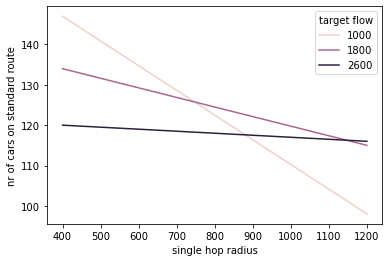

In [46]:

# load data for ad-hoc simulation
df_name = sim_path + sim_name + ".csv"
df = pd.read_csv(df_name, sep = ",")

# plot number of cars on standard route
sb.lineplot(data = df, x = "hop radius", y = "standard route", hue = "target flow")
plt.ylabel("nr of cars on standard route")
plt.xlabel("single hop radius")
plt.show()


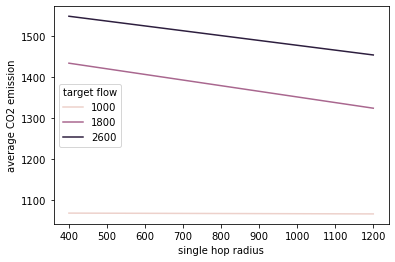

In [47]:
# plot average CO2 emission
sb.lineplot(data = df, x = "hop radius", y = "CO2", hue = "target flow")
plt.ylabel("average CO2 emission")
plt.xlabel("single hop radius")
plt.show()

Simulation to investigate the influence of number of cars, and loss probability

In [52]:
"""
Ad-Hoc Simulation:
    vary number of cars
    vary loss probability
"""
baseline()

# set corresponding boolean in scenario.config
setSNS(True)
setCell(False)
percentage = 1
setPercentageOfWifi(percentage)
setPercentageOfCell(0)
setPercentageOfWifiAndCell(0)

# set simulation parameters
radius = 400
setSinglehopRadius(radius)
targetFlow = 1800
setTargetFlow(targetFlow)
#TTL = 8
#setSnsTtl(TTL)

# set simulation name
nw_type = "ad-hoc"
sim_name = "ad_hoc_simulation" + "_varyNcarsLossp"

# different parameter settings for no of cars with ad-hoc antenna, loss prob, ttl
l_lossp = np.arange(0, 1, 0.4)
l_ncars = [100, 200, 300, 400, 500] 
l_Ttl = [3, 10]

# initialize dictionary to save simulation data   
sim_data = {"network type": [],
            "ncars": [],
            "comm percentage": [],
            "loss p": [],
            "TTL": [],
            "hop radius": [],
            "target flow": [],
            "standard route": [],
            "alternative route": [], 
            "CO2": []}

In [53]:
### RUN SIMULATION

# simulate varying number of cars
for ncars in l_ncars:
    setNumberOfCars(ncars)
    
    # simulate varying TTL
    for ttl in l_Ttl:
        setSnsTtl(ttl)

        # simulate varying loss probability
        for p in l_lossp:
            print("nr cars: ", ncars, " TTL: ", ttl, " loss p: ", p)

            # set loss probability in ad-hoc nw
            setSnsLossProb(p)

            # run simulation
            mosaic.run_simulation(visualize=False)
            res = mosaic.eval_simulation()

            # write data to dictionary
            sim_data["network type"].append(nw_type)
            sim_data["ncars"].append(ncars)
            sim_data["comm percentage"].append(percentage)
            sim_data["loss p"].append(p)
            sim_data["TTL"].append(ttl)
            sim_data["hop radius"].append(radius)
            sim_data["target flow"].append(flow)
            sim_data["standard route"].append(res[0])
            sim_data["alternative route"].append(res[1])
            sim_data["CO2"].append(res[2])

            # delete log files
            deleteAllLogs()

# convert dict with simulation data to df to csv 
df = pd.DataFrame(data = sim_data, columns = sim_data.keys())

# save for further processing
df.to_csv(sim_path + sim_name + ".csv" )

nr cars:  100  loss p:  0.0
Running: ./mosaic.sh -s Barnim
2021-07-30 09:24:00,711 INFO  ROOT - Running Eclipse MOSAIC 21.0 on Java JRE v16.0.1 (AdoptOpenJDK)
2021-07-30 09:24:00,899 INFO  FederationManagement - Start federation with id 'Barnim'
2021-07-30 09:24:00,904 INFO  FederationManagement - Add ambassador/federate with id 'application'
2021-07-30 09:24:00,905 INFO  FederationManagement - Add ambassador/federate with id 'environment'
2021-07-30 09:24:00,905 INFO  FederationManagement - Add ambassador/federate with id 'mapping'
2021-07-30 09:24:00,905 INFO  FederationManagement - Add ambassador/federate with id 'sns'
2021-07-30 09:24:00,905 INFO  FederationManagement - Add ambassador/federate with id 'sumo'
2021-07-30 09:24:00,906 INFO  FederationManagement - Deploying federate 'sumo' locally in ./tmp/sumo
2021-07-30 09:24:00,925 INFO  FederationManagement - Starting federate 'sumo' locally in ./tmp/sumo
2021-07-30 09:24:00,925 INFO  FederationManagement - Add ambassador/federate 

<ipython-input-53-60a66c47d03e>:19: DtypeWarning: Columns (3,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  res = mosaic.eval_simulation()


100 vehicles took the standard route
0 vehicles took the alternate route
On average a vehicle released 1487.67 g CO2
nr cars:  100  loss p:  0.4
Running: ./mosaic.sh -s Barnim
2021-07-30 09:24:48,548 INFO  ROOT - Running Eclipse MOSAIC 21.0 on Java JRE v16.0.1 (AdoptOpenJDK)
2021-07-30 09:24:48,791 INFO  FederationManagement - Start federation with id 'Barnim'
2021-07-30 09:24:48,796 INFO  FederationManagement - Add ambassador/federate with id 'application'
2021-07-30 09:24:48,797 INFO  FederationManagement - Add ambassador/federate with id 'environment'
2021-07-30 09:24:48,797 INFO  FederationManagement - Add ambassador/federate with id 'mapping'
2021-07-30 09:24:48,798 INFO  FederationManagement - Add ambassador/federate with id 'sns'
2021-07-30 09:24:48,798 INFO  FederationManagement - Add ambassador/federate with id 'sumo'
2021-07-30 09:24:48,798 INFO  FederationManagement - Deploying federate 'sumo' locally in ./tmp/sumo
2021-07-30 09:24:48,807 INFO  FederationManagement - Startin

<ipython-input-53-60a66c47d03e>:19: DtypeWarning: Columns (3,5,6,7,10) have mixed types.Specify dtype option on import or set low_memory=False.
  res = mosaic.eval_simulation()


100 vehicles took the standard route
0 vehicles took the alternate route
On average a vehicle released 1487.67 g CO2
nr cars:  100  loss p:  0.0
Running: ./mosaic.sh -s Barnim
2021-07-30 09:26:19,421 INFO  ROOT - Running Eclipse MOSAIC 21.0 on Java JRE v16.0.1 (AdoptOpenJDK)
2021-07-30 09:26:19,696 INFO  FederationManagement - Start federation with id 'Barnim'
2021-07-30 09:26:19,696 INFO  FederationManagement - Add ambassador/federate with id 'application'
2021-07-30 09:26:19,697 INFO  FederationManagement - Add ambassador/federate with id 'environment'
2021-07-30 09:26:19,697 INFO  FederationManagement - Add ambassador/federate with id 'mapping'
2021-07-30 09:26:19,697 INFO  FederationManagement - Add ambassador/federate with id 'sns'
2021-07-30 09:26:19,697 INFO  FederationManagement - Add ambassador/federate with id 'sumo'
2021-07-30 09:26:19,697 INFO  FederationManagement - Deploying federate 'sumo' locally in ./tmp/sumo
2021-07-30 09:26:19,708 INFO  FederationManagement - Startin

200 vehicles took the standard route
0 vehicles took the alternate route
On average a vehicle released 1559.08 g CO2
nr cars:  200  loss p:  0.0
Running: ./mosaic.sh -s Barnim
2021-07-30 09:32:35,368 INFO  ROOT - Running Eclipse MOSAIC 21.0 on Java JRE v16.0.1 (AdoptOpenJDK)
2021-07-30 09:32:35,605 INFO  FederationManagement - Start federation with id 'Barnim'
2021-07-30 09:32:35,606 INFO  FederationManagement - Add ambassador/federate with id 'application'
2021-07-30 09:32:35,607 INFO  FederationManagement - Add ambassador/federate with id 'environment'
2021-07-30 09:32:35,607 INFO  FederationManagement - Add ambassador/federate with id 'mapping'
2021-07-30 09:32:35,607 INFO  FederationManagement - Add ambassador/federate with id 'sns'
2021-07-30 09:32:35,607 INFO  FederationManagement - Add ambassador/federate with id 'sumo'
2021-07-30 09:32:35,607 INFO  FederationManagement - Deploying federate 'sumo' locally in ./tmp/sumo
2021-07-30 09:32:35,616 INFO  FederationManagement - Startin

300 vehicles took the standard route
0 vehicles took the alternate route
On average a vehicle released 1521.91 g CO2
nr cars:  300  loss p:  0.0
Running: ./mosaic.sh -s Barnim
2021-07-30 09:42:44,714 INFO  ROOT - Running Eclipse MOSAIC 21.0 on Java JRE v16.0.1 (AdoptOpenJDK)
2021-07-30 09:42:45,035 INFO  FederationManagement - Start federation with id 'Barnim'
2021-07-30 09:42:45,040 INFO  FederationManagement - Add ambassador/federate with id 'application'
2021-07-30 09:42:45,041 INFO  FederationManagement - Add ambassador/federate with id 'environment'
2021-07-30 09:42:45,041 INFO  FederationManagement - Add ambassador/federate with id 'mapping'
2021-07-30 09:42:45,041 INFO  FederationManagement - Add ambassador/federate with id 'sns'
2021-07-30 09:42:45,042 INFO  FederationManagement - Add ambassador/federate with id 'sumo'
2021-07-30 09:42:45,042 INFO  FederationManagement - Deploying federate 'sumo' locally in ./tmp/sumo
2021-07-30 09:42:45,074 INFO  FederationManagement - Startin

<ipython-input-53-60a66c47d03e>:19: DtypeWarning: Columns (3,5,6,7,8,9,10,11,13,27,28,29) have mixed types.Specify dtype option on import or set low_memory=False.
  res = mosaic.eval_simulation()


400 vehicles took the standard route
0 vehicles took the alternate route
On average a vehicle released 1377.48 g CO2
nr cars:  400  loss p:  0.4
Running: ./mosaic.sh -s Barnim
2021-07-30 09:49:36,153 INFO  ROOT - Running Eclipse MOSAIC 21.0 on Java JRE v16.0.1 (AdoptOpenJDK)
2021-07-30 09:49:36,433 INFO  FederationManagement - Start federation with id 'Barnim'
2021-07-30 09:49:36,434 INFO  FederationManagement - Add ambassador/federate with id 'application'
2021-07-30 09:49:36,434 INFO  FederationManagement - Add ambassador/federate with id 'environment'
2021-07-30 09:49:36,435 INFO  FederationManagement - Add ambassador/federate with id 'mapping'
2021-07-30 09:49:36,435 INFO  FederationManagement - Add ambassador/federate with id 'sns'
2021-07-30 09:49:36,435 INFO  FederationManagement - Add ambassador/federate with id 'sumo'
2021-07-30 09:49:36,435 INFO  FederationManagement - Deploying federate 'sumo' locally in ./tmp/sumo
2021-07-30 09:49:36,465 INFO  FederationManagement - Startin

499 vehicles took the standard route
0 vehicles took the alternate route
On average a vehicle released 1183.23 g CO2
nr cars:  500  loss p:  0.4
Running: ./mosaic.sh -s Barnim
2021-07-30 10:05:26,689 INFO  ROOT - Running Eclipse MOSAIC 21.0 on Java JRE v16.0.1 (AdoptOpenJDK)
2021-07-30 10:05:27,002 INFO  FederationManagement - Start federation with id 'Barnim'
2021-07-30 10:05:27,010 INFO  FederationManagement - Add ambassador/federate with id 'application'
2021-07-30 10:05:27,012 INFO  FederationManagement - Add ambassador/federate with id 'environment'
2021-07-30 10:05:27,012 INFO  FederationManagement - Add ambassador/federate with id 'mapping'
2021-07-30 10:05:27,012 INFO  FederationManagement - Add ambassador/federate with id 'sns'
2021-07-30 10:05:27,013 INFO  FederationManagement - Add ambassador/federate with id 'sumo'
2021-07-30 10:05:27,013 INFO  FederationManagement - Deploying federate 'sumo' locally in ./tmp/sumo
2021-07-30 10:05:27,039 INFO  FederationManagement - Startin

<ipython-input-53-60a66c47d03e>:19: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  res = mosaic.eval_simulation()


499 vehicles took the standard route
0 vehicles took the alternate route
On average a vehicle released 1183.23 g CO2
nr cars:  500  loss p:  0.0
Running: ./mosaic.sh -s Barnim
2021-07-30 10:13:44,308 INFO  ROOT - Running Eclipse MOSAIC 21.0 on Java JRE v16.0.1 (AdoptOpenJDK)
2021-07-30 10:13:44,545 INFO  FederationManagement - Start federation with id 'Barnim'
2021-07-30 10:13:44,545 INFO  FederationManagement - Add ambassador/federate with id 'application'
2021-07-30 10:13:44,547 INFO  FederationManagement - Add ambassador/federate with id 'environment'
2021-07-30 10:13:44,547 INFO  FederationManagement - Add ambassador/federate with id 'mapping'
2021-07-30 10:13:44,547 INFO  FederationManagement - Add ambassador/federate with id 'sns'
2021-07-30 10:13:44,547 INFO  FederationManagement - Add ambassador/federate with id 'sumo'
2021-07-30 10:13:44,547 INFO  FederationManagement - Deploying federate 'sumo' locally in ./tmp/sumo
2021-07-30 10:13:44,575 INFO  FederationManagement - Startin

<ipython-input-53-60a66c47d03e>:19: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  res = mosaic.eval_simulation()


318 vehicles took the standard route
181 vehicles took the alternate route
On average a vehicle released 1090.28 g CO2
nr cars:  500  loss p:  0.4
Running: ./mosaic.sh -s Barnim
2021-07-30 10:15:03,842 INFO  ROOT - Running Eclipse MOSAIC 21.0 on Java JRE v16.0.1 (AdoptOpenJDK)
2021-07-30 10:15:04,158 INFO  FederationManagement - Start federation with id 'Barnim'
2021-07-30 10:15:04,158 INFO  FederationManagement - Add ambassador/federate with id 'application'
2021-07-30 10:15:04,159 INFO  FederationManagement - Add ambassador/federate with id 'environment'
2021-07-30 10:15:04,159 INFO  FederationManagement - Add ambassador/federate with id 'mapping'
2021-07-30 10:15:04,159 INFO  FederationManagement - Add ambassador/federate with id 'sns'
2021-07-30 10:15:04,160 INFO  FederationManagement - Add ambassador/federate with id 'sumo'
2021-07-30 10:15:04,160 INFO  FederationManagement - Deploying federate 'sumo' locally in ./tmp/sumo
2021-07-30 10:15:04,174 INFO  FederationManagement - Start

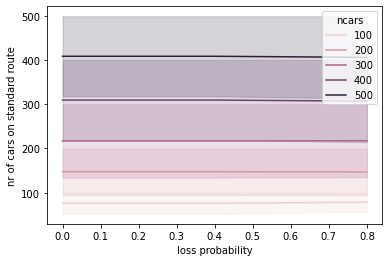

In [54]:

# load data for ad-hoc simulation
df_name = sim_path + sim_name + ".csv"
df = pd.read_csv(df_name, sep = ",")

# plot number of cars on standard route
sb.lineplot(data = df, x = "loss p", y = "standard route", hue = "ncars")
plt.ylabel("nr of cars on standard route")
plt.xlabel("loss probability")
plt.show()

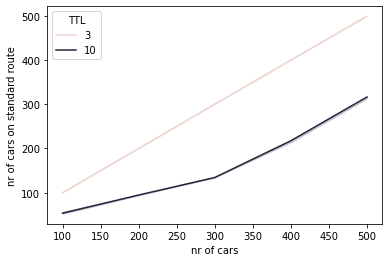

In [55]:
# plot number of cars on standard route
sb.lineplot(data = df, x = "ncars", y = "standard route", hue = "TTL")
plt.ylabel("nr of cars on standard route")
plt.xlabel("nr of cars")
plt.show()

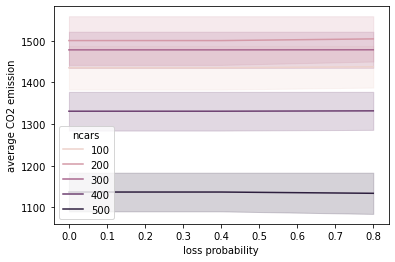

In [56]:
# plot average CO2 emission
sb.lineplot(data = df, x = "loss p", y = "CO2", hue = "ncars")
plt.ylabel("average CO2 emission")
plt.xlabel("loss probability")
plt.show()

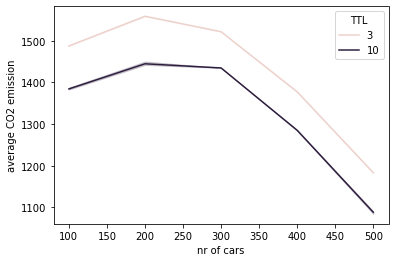

In [57]:
# plot number of cars on standard route
sb.lineplot(data = df, x = "ncars", y = "CO2", hue = "TTL")
plt.ylabel("average CO2 emission")
plt.xlabel("nr of cars")
plt.show()

# Simulations with cellular communication

Simulation to investigate the influence of percentage of cars with cellular technology, number of retries, and loss probability

In [58]:
"""
Cellular Simulation:
    vary percentage of cars with communication ability
    vary number of retries
    vary loss probability 
"""
baseline()

# set corresponding boolean in scenario.config
setSNS(False)
setCell(True)
setPercentageOfWifi(0)
percentage = 1
setPercentageOfCell(percentage)
setPercentageOfWifiAndCell(0)

# set simulation parameters
ncars = 300
setNumberOfCars(ncars)
radius = 400
setSinglehopRadius(radius)
flow = 1800
setTargetFlow(flow)

# set simulation path and name
nw_type = "cell"
sim_name = "cellular_simulation" + "_r" + str(radius) + "_ncars" + str(ncars) + "_varyPercRetriesLossp"

# different parameter settings for no of cars with ad-hoc antenna, loss prob, ttl
l_percentage = np.arange(0, 1, 0.5)
l_lossp = np.arange(0, 1, 0.4)
l_retries = [1, 8] #range(1, 11, 2)

# initialize dictionary to save simulation data  
sim_data = {"network type": [],
            "ncars": [],
            "comm percentage": [],
            "loss p": [],
            "retries": [],
            "hop radius": [],
            "target flow": [],
            "standard route": [],
            "alternative route": [], 
            "CO2": []}

In [59]:
### RUN SIMULATION
# vary percentage of cars with cellular comm possibility
for percentage in l_percentage:
    setPercentageOfCell(percentage)

    # simulate varying number of retries
    for ret in l_retries:
        setRetriesCell(ret)

        # simulate varying loss prob between AP and STA
        for p in l_lossp:
            print("percentage: ", percentage," retries: ", ret, " loss p: ", p)
            
            # set loss probability in ad-hoc nw
            setCellLossProb(p)

            # run simulation
            mosaic.run_simulation(visualize=False)
            res = mosaic.eval_simulation()

            # write data to dictionary
            sim_data["network type"].append(nw_type)
            sim_data["ncars"].append(ncars)
            sim_data["comm percentage"].append(percentage)
            sim_data["loss p"].append(p)
            sim_data["retries"].append(ret)
            sim_data["hop radius"].append(radius)
            sim_data["target flow"].append(flow)
            sim_data["standard route"].append(res[0])
            sim_data["alternative route"].append(res[1])
            sim_data["CO2"].append(res[2])
            
            # delete log files
            deleteAllLogs()

# convert dict with simulation data to df to csv 
df = pd.DataFrame(data = sim_data, columns = sim_data.keys())

# save for further processing
df.to_csv(sim_path + sim_name + ".csv" )


percentage:  0.0  retries:  1  loss p:  0.0
Running: ./mosaic.sh -s Barnim
2021-07-30 10:29:55,582 INFO  ROOT - Running Eclipse MOSAIC 21.0 on Java JRE v16.0.1 (AdoptOpenJDK)
2021-07-30 10:29:55,907 INFO  FederationManagement - Start federation with id 'Barnim'
2021-07-30 10:29:55,908 INFO  FederationManagement - Add ambassador/federate with id 'application'
2021-07-30 10:29:55,909 INFO  FederationManagement - Add ambassador/federate with id 'environment'
2021-07-30 10:29:55,909 INFO  FederationManagement - Add ambassador/federate with id 'mapping'
2021-07-30 10:29:55,909 INFO  FederationManagement - Add ambassador/federate with id 'cell'
2021-07-30 10:29:55,909 INFO  FederationManagement - Add ambassador/federate with id 'sumo'
2021-07-30 10:29:55,909 INFO  FederationManagement - Deploying federate 'sumo' locally in ./tmp/sumo
2021-07-30 10:29:55,919 INFO  FederationManagement - Starting federate 'sumo' locally in ./tmp/sumo
2021-07-30 10:29:55,919 INFO  FederationManagement - Add amb

<ipython-input-59-fc5e1e2206bf>:19: DtypeWarning: Columns (3,5,6,7,10) have mixed types.Specify dtype option on import or set low_memory=False.
  res = mosaic.eval_simulation()


173 vehicles took the standard route
127 vehicles took the alternate route
On average a vehicle released 1471.21 g CO2
percentage:  0.0  retries:  1  loss p:  0.4
Running: ./mosaic.sh -s Barnim
2021-07-30 10:30:30,501 INFO  ROOT - Running Eclipse MOSAIC 21.0 on Java JRE v16.0.1 (AdoptOpenJDK)
2021-07-30 10:30:30,785 INFO  FederationManagement - Start federation with id 'Barnim'
2021-07-30 10:30:30,786 INFO  FederationManagement - Add ambassador/federate with id 'application'
2021-07-30 10:30:30,787 INFO  FederationManagement - Add ambassador/federate with id 'environment'
2021-07-30 10:30:30,788 INFO  FederationManagement - Add ambassador/federate with id 'mapping'
2021-07-30 10:30:30,788 INFO  FederationManagement - Add ambassador/federate with id 'cell'
2021-07-30 10:30:30,788 INFO  FederationManagement - Add ambassador/federate with id 'sumo'
2021-07-30 10:30:30,788 INFO  FederationManagement - Deploying federate 'sumo' locally in ./tmp/sumo
2021-07-30 10:30:30,800 INFO  FederationM

<ipython-input-59-fc5e1e2206bf>:19: DtypeWarning: Columns (3,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  res = mosaic.eval_simulation()


174 vehicles took the standard route
126 vehicles took the alternate route
On average a vehicle released 1472.12 g CO2
percentage:  0.0  retries:  8  loss p:  0.0
Running: ./mosaic.sh -s Barnim
2021-07-30 10:31:28,121 INFO  ROOT - Running Eclipse MOSAIC 21.0 on Java JRE v16.0.1 (AdoptOpenJDK)
2021-07-30 10:31:28,402 INFO  FederationManagement - Start federation with id 'Barnim'
2021-07-30 10:31:28,403 INFO  FederationManagement - Add ambassador/federate with id 'application'
2021-07-30 10:31:28,404 INFO  FederationManagement - Add ambassador/federate with id 'environment'
2021-07-30 10:31:28,404 INFO  FederationManagement - Add ambassador/federate with id 'mapping'
2021-07-30 10:31:28,404 INFO  FederationManagement - Add ambassador/federate with id 'cell'
2021-07-30 10:31:28,404 INFO  FederationManagement - Add ambassador/federate with id 'sumo'
2021-07-30 10:31:28,404 INFO  FederationManagement - Deploying federate 'sumo' locally in ./tmp/sumo
2021-07-30 10:31:28,412 INFO  FederationM

<ipython-input-59-fc5e1e2206bf>:19: DtypeWarning: Columns (3,5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  res = mosaic.eval_simulation()


113 vehicles took the standard route
187 vehicles took the alternate route
On average a vehicle released 1356.79 g CO2
percentage:  0.5  retries:  1  loss p:  0.4
Running: ./mosaic.sh -s Barnim
2021-07-30 10:33:53,886 INFO  ROOT - Running Eclipse MOSAIC 21.0 on Java JRE v16.0.1 (AdoptOpenJDK)
2021-07-30 10:33:54,117 INFO  FederationManagement - Start federation with id 'Barnim'
2021-07-30 10:33:54,118 INFO  FederationManagement - Add ambassador/federate with id 'application'
2021-07-30 10:33:54,119 INFO  FederationManagement - Add ambassador/federate with id 'environment'
2021-07-30 10:33:54,119 INFO  FederationManagement - Add ambassador/federate with id 'mapping'
2021-07-30 10:33:54,119 INFO  FederationManagement - Add ambassador/federate with id 'cell'
2021-07-30 10:33:54,119 INFO  FederationManagement - Add ambassador/federate with id 'sumo'
2021-07-30 10:33:54,119 INFO  FederationManagement - Deploying federate 'sumo' locally in ./tmp/sumo
2021-07-30 10:33:54,127 INFO  FederationM

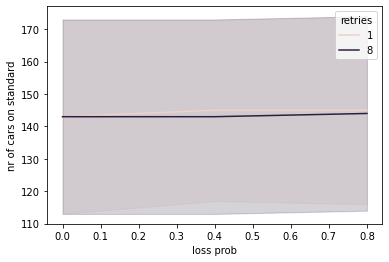

In [60]:

# load data for cellular simulation
df_name = sim_path + sim_name + ".csv"
df = pd.read_csv(df_name, sep = ",")

# plot number of cars on standard route
sb.lineplot(data = df, x = "loss p", y = "standard route", hue = "retries")
plt.ylabel("nr of cars on standard")
plt.xlabel("loss prob")
plt.show()


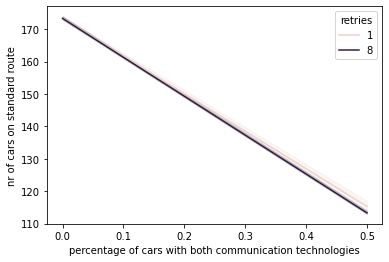

In [62]:
# plot number of cars on standard route
sb.lineplot(data = df, x = "comm percentage", y = "standard route", hue = "retries")
plt.ylabel("nr of cars on standard route")
plt.xlabel("percentage of cars with both communication technologies")
plt.show()

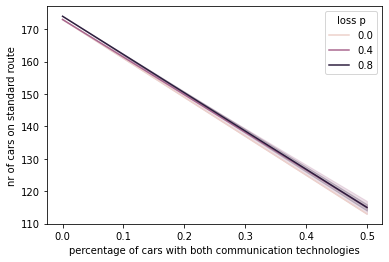

In [63]:
# plot number of cars on standard route
sb.lineplot(data = df, x = "comm percentage", y = "standard route", hue = "loss p")
plt.ylabel("nr of cars on standard route")
plt.xlabel("percentage of cars with both communication technologies")
plt.show()

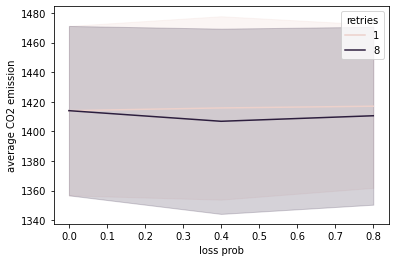

In [61]:

# plot average CO2 emission
sb.lineplot(data = df, x = "loss p", y = "CO2", hue = "retries")
plt.ylabel("average CO2 emission")
plt.xlabel("loss prob")
plt.show()


## Simulation to investigate the influence of single hop radius, and target flow

In [74]:
"""
Cellular Simulation:
    vary target flow
    vary single hop radius
"""
baseline()

# set corresponding boolean in scenario.config
setSNS(False)
setCell(True)
setPercentageOfWifi(0)
percentage = 1
setPercentageOfCell(percentage)
setPercentageOfWifiAndCell(0)

# set simulation parameters
ncars = 300
setNumberOfCars(ncars)
retries = 5
setRetriesCell(retries)

# set simulation path and name
nw_type = "cell"
sim_name = "cellular_simulation" + "_r" + str(radius) + "_ncars" + str(ncars) + "_varyFlowRadiusLossp"

# different parameter settings for no of cars with ad-hoc antenna, loss prob, ttl
l_radius = [400, 1200] #[100, 400, 800, 1200] #[400, 1200]
l_flows = [1000, 1800, 2600] #[1000,1200,1400,1600,1800,2000,2200,2400,2600] #[1000, 1800, 2600]
l_lossp = np.arange(0, 1, 0.4)

# initialize dictionary to save simulation data  
sim_data = {"network type": [],
            "ncars": [],
            "comm percentage": [],
            "loss p": [],
            "retries": [],
            "hop radius": [],
            "target flow": [],
            "standard route": [],
            "alternative route": [], 
            "CO2": []}

In [ ]:
### RUN SIMULATION
# simulate varying target flow
for flow in l_flows:
    setTargetFlow(flow)

    # simulate varying singlehop radius
    for radius in l_radius:
        setSinglehopRadius(radius)
        
        for p in l_lossp:
            setCellLossProb(p)
        
            print("flow: ", flow," radius: ", radius, " loss prob: ", p)

            # run simulation
            mosaic.run_simulation(visualize=False)
            res = mosaic.eval_simulation()

            # write data to dictionary
            sim_data["network type"].append(nw_type)
            sim_data["ncars"].append(ncars)
            sim_data["comm percentage"].append(percentage)
            sim_data["loss p"].append(p)
            sim_data["retries"].append(ret)
            sim_data["hop radius"].append(radius)
            sim_data["target flow"].append(flow)
            sim_data["standard route"].append(res[0])
            sim_data["alternative route"].append(res[1])
            sim_data["CO2"].append(res[2])

            # delete log files
            deleteAllLogs()

# convert dict with simulation data to df to csv 
df = pd.DataFrame(data = sim_data, columns = sim_data.keys())

# save for further processing
df.to_csv(sim_path + sim_name + ".csv" )


flow:  1000  radius:  400  loss prob:  0.0
Running: ./mosaic.sh -s Barnim
2021-07-30 11:19:17,373 INFO  ROOT - Running Eclipse MOSAIC 21.0 on Java JRE v16.0.1 (AdoptOpenJDK)
2021-07-30 11:19:17,585 INFO  FederationManagement - Start federation with id 'Barnim'
2021-07-30 11:19:17,586 INFO  FederationManagement - Add ambassador/federate with id 'application'
2021-07-30 11:19:17,586 INFO  FederationManagement - Add ambassador/federate with id 'environment'
2021-07-30 11:19:17,587 INFO  FederationManagement - Add ambassador/federate with id 'mapping'
2021-07-30 11:19:17,587 INFO  FederationManagement - Add ambassador/federate with id 'cell'
2021-07-30 11:19:17,587 INFO  FederationManagement - Add ambassador/federate with id 'sumo'
2021-07-30 11:19:17,587 INFO  FederationManagement - Deploying federate 'sumo' locally in ./tmp/sumo
2021-07-30 11:19:17,597 INFO  FederationManagement - Starting federate 'sumo' locally in ./tmp/sumo
2021-07-30 11:19:17,597 INFO  FederationManagement - Add amba

<ipython-input-75-8d4c5ff513d7>:17: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  res = mosaic.eval_simulation()


101 vehicles took the standard route
176 vehicles took the alternate route
On average a vehicle released 1054.34 g CO2
flow:  1000  radius:  400  loss prob:  0.4
Running: ./mosaic.sh -s Barnim
2021-07-30 11:19:53,080 INFO  ROOT - Running Eclipse MOSAIC 21.0 on Java JRE v16.0.1 (AdoptOpenJDK)
2021-07-30 11:19:53,381 INFO  FederationManagement - Start federation with id 'Barnim'
2021-07-30 11:19:53,386 INFO  FederationManagement - Add ambassador/federate with id 'application'
2021-07-30 11:19:53,387 INFO  FederationManagement - Add ambassador/federate with id 'environment'
2021-07-30 11:19:53,388 INFO  FederationManagement - Add ambassador/federate with id 'mapping'
2021-07-30 11:19:53,388 INFO  FederationManagement - Add ambassador/federate with id 'cell'
2021-07-30 11:19:53,388 INFO  FederationManagement - Add ambassador/federate with id 'sumo'
2021-07-30 11:19:53,388 INFO  FederationManagement - Deploying federate 'sumo' locally in ./tmp/sumo
2021-07-30 11:19:53,398 INFO  FederationMa

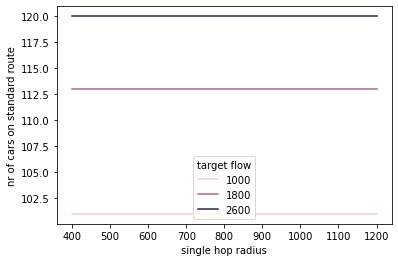

In [66]:

# load data for ad-hoc simulation
df_name = sim_path + sim_name + ".csv"
df = pd.read_csv(df_name, sep = ",")

# plot number of cars on standard route
sb.lineplot(data = df, x = "hop radius", y = "standard route", hue = "target flow")
plt.ylabel("nr of cars on standard route")
plt.xlabel("single hop radius")
plt.show()


In [ ]:
# plot number of cars on standard route
sb.lineplot(data = df, x = "hop radius", y = "standard route", hue = "loss p")
plt.ylabel("nr of cars on standard route")
plt.xlabel("single hop radius")
plt.show()


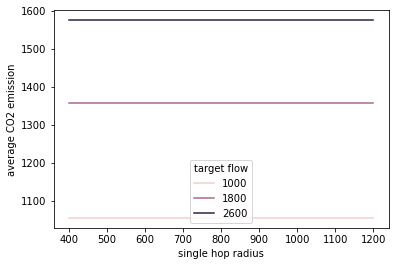

In [67]:
# plot number of cars on standard route
sb.lineplot(data = df, x = "hop radius", y = "CO2", hue = "target flow")
plt.ylabel("average CO2 emission")
plt.xlabel("single hop radius")
plt.show()

## Simulation to investigate the influence of target flow, network capacity, and loss probability

In [68]:
"""
Cellular Simulation:
    vary target flow
    vary network capacity
    vary loss probability
"""
baseline()

# set corresponding boolean in scenario.config
setSNS(False)
setCell(True)
setPercentageOfWifi(0)
percentage = 1
setPercentageOfCell(percentage)
setPercentageOfWifiAndCell(0)

# set simulation parameters
ncars = 300
setNumberOfCars(ncars)
retries = 5
setRetriesCell(retries)
radius = 400
setSinglehopRadius(radius)

# set simulation path and name
nw_type = "cell"
sim_name = "cellular_simulation" + "_r" + str(radius) + "_ncars" + str(noCars) + "_varyFlowCapaLossp"

# different parameter settings for no of cars with ad-hoc antenna, loss prob, ttl
l_lossp = np.arange(0, 1, 0.4)
l_capacity = [1000, 50000, 500000] #[1000, 5000, 10000, 50000, 100000, 500000, 1000000] #[1000, 50000, 500000] 
l_flows = [1000, 1800, 2600] #[1000,1200,1400,1600,1800,2000,2200,2400,2600] #[1000, 1800, 2600] 

# initialize dictionary to save simulation data  
sim_data = {"network type": [],
            "capacity": [],
            "ncars": [],
            "comm percentage": [],
            "loss p": [],
            "retries": [],
            "hop radius": [],
            "target flow": [],
            "standard route": [],
            "alternative route": [], 
            "CO2": []}

In [69]:
### RUN SIMULATION
# simulate varying target flow
for cap in l_capacity:
    setUplinkCapacity(cap)
    setDownlinkCapacity(cap)

    # simulate varying target flow
    for flow in l_flows:
        setTargetFlow(flow)
        
        # simulate varying loss prob between AP and STA
        for p in l_lossp:
            print("capacity: ", cap," flow: ", flow, " loss p: ", p)
            
            # set loss probability in ad-hoc nw
            setCellLossProb(p)

            # run simulation
            mosaic.run_simulation(visualize=False)
            res = mosaic.eval_simulation()

            # write data to dictionary
            sim_data["network type"].append(nw_type)
            sim_data["capacity"].append(cap)
            sim_data["ncars"].append(ncars)
            sim_data["comm percentage"].append(percentage)
            sim_data["loss p"].append(p)
            sim_data["retries"].append(ret)
            sim_data["hop radius"].append(radius)
            sim_data["target flow"].append(flow)
            sim_data["standard route"].append(res[0])
            sim_data["alternative route"].append(res[1])
            sim_data["CO2"].append(res[2])

            # delete log files
            deleteAllLogs()

# convert dict with simulation data to df to csv 
df = pd.DataFrame(data = sim_data, columns = sim_data.keys())

# save for further processing
df.to_csv(sim_path + sim_name + ".csv" )


capacity:  1000  flow:  1000  loss p:  0.0
Running: ./mosaic.sh -s Barnim
2021-07-30 11:03:48,489 INFO  ROOT - Running Eclipse MOSAIC 21.0 on Java JRE v16.0.1 (AdoptOpenJDK)
2021-07-30 11:03:48,738 INFO  FederationManagement - Start federation with id 'Barnim'
2021-07-30 11:03:48,739 INFO  FederationManagement - Add ambassador/federate with id 'application'
2021-07-30 11:03:48,740 INFO  FederationManagement - Add ambassador/federate with id 'environment'
2021-07-30 11:03:48,740 INFO  FederationManagement - Add ambassador/federate with id 'mapping'
2021-07-30 11:03:48,740 INFO  FederationManagement - Add ambassador/federate with id 'cell'
2021-07-30 11:03:48,741 INFO  FederationManagement - Add ambassador/federate with id 'sumo'
2021-07-30 11:03:48,741 INFO  FederationManagement - Deploying federate 'sumo' locally in ./tmp/sumo
2021-07-30 11:03:48,752 INFO  FederationManagement - Starting federate 'sumo' locally in ./tmp/sumo
2021-07-30 11:03:48,753 INFO  FederationManagement - Add amba

<ipython-input-69-1876685f28d4>:20: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  res = mosaic.eval_simulation()


243 vehicles took the standard route
34 vehicles took the alternate route
On average a vehicle released 1144.99 g CO2
capacity:  1000  flow:  1000  loss p:  0.4
Running: ./mosaic.sh -s Barnim
2021-07-30 11:04:10,604 INFO  ROOT - Running Eclipse MOSAIC 21.0 on Java JRE v16.0.1 (AdoptOpenJDK)
2021-07-30 11:04:10,847 INFO  FederationManagement - Start federation with id 'Barnim'
2021-07-30 11:04:10,851 INFO  FederationManagement - Add ambassador/federate with id 'application'
2021-07-30 11:04:10,852 INFO  FederationManagement - Add ambassador/federate with id 'environment'
2021-07-30 11:04:10,853 INFO  FederationManagement - Add ambassador/federate with id 'mapping'
2021-07-30 11:04:10,853 INFO  FederationManagement - Add ambassador/federate with id 'cell'
2021-07-30 11:04:10,853 INFO  FederationManagement - Add ambassador/federate with id 'sumo'
2021-07-30 11:04:10,853 INFO  FederationManagement - Deploying federate 'sumo' locally in ./tmp/sumo
2021-07-30 11:04:10,864 INFO  FederationMan

<ipython-input-69-1876685f28d4>:20: DtypeWarning: Columns (3,5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  res = mosaic.eval_simulation()


267 vehicles took the standard route
33 vehicles took the alternate route
On average a vehicle released 1484.40 g CO2
capacity:  1000  flow:  1800  loss p:  0.4
Running: ./mosaic.sh -s Barnim
2021-07-30 11:05:17,717 INFO  ROOT - Running Eclipse MOSAIC 21.0 on Java JRE v16.0.1 (AdoptOpenJDK)
2021-07-30 11:05:17,949 INFO  FederationManagement - Start federation with id 'Barnim'
2021-07-30 11:05:17,950 INFO  FederationManagement - Add ambassador/federate with id 'application'
2021-07-30 11:05:17,951 INFO  FederationManagement - Add ambassador/federate with id 'environment'
2021-07-30 11:05:17,951 INFO  FederationManagement - Add ambassador/federate with id 'mapping'
2021-07-30 11:05:17,951 INFO  FederationManagement - Add ambassador/federate with id 'cell'
2021-07-30 11:05:17,951 INFO  FederationManagement - Add ambassador/federate with id 'sumo'
2021-07-30 11:05:17,951 INFO  FederationManagement - Deploying federate 'sumo' locally in ./tmp/sumo
2021-07-30 11:05:17,960 INFO  FederationMan

150 vehicles took the standard route
127 vehicles took the alternate route
On average a vehicle released 1100.27 g CO2
capacity:  50000  flow:  1000  loss p:  0.4
Running: ./mosaic.sh -s Barnim
2021-07-30 11:07:50,087 INFO  ROOT - Running Eclipse MOSAIC 21.0 on Java JRE v16.0.1 (AdoptOpenJDK)
2021-07-30 11:07:50,332 INFO  FederationManagement - Start federation with id 'Barnim'
2021-07-30 11:07:50,342 INFO  FederationManagement - Add ambassador/federate with id 'application'
2021-07-30 11:07:50,343 INFO  FederationManagement - Add ambassador/federate with id 'environment'
2021-07-30 11:07:50,343 INFO  FederationManagement - Add ambassador/federate with id 'mapping'
2021-07-30 11:07:50,343 INFO  FederationManagement - Add ambassador/federate with id 'cell'
2021-07-30 11:07:50,343 INFO  FederationManagement - Add ambassador/federate with id 'sumo'
2021-07-30 11:07:50,343 INFO  FederationManagement - Deploying federate 'sumo' locally in ./tmp/sumo
2021-07-30 11:07:50,354 INFO  FederationM

138 vehicles took the standard route
162 vehicles took the alternate route
On average a vehicle released 1591.14 g CO2
capacity:  50000  flow:  2600  loss p:  0.4
Running: ./mosaic.sh -s Barnim
2021-07-30 11:10:16,904 INFO  ROOT - Running Eclipse MOSAIC 21.0 on Java JRE v16.0.1 (AdoptOpenJDK)
2021-07-30 11:10:17,274 INFO  FederationManagement - Start federation with id 'Barnim'
2021-07-30 11:10:17,278 INFO  FederationManagement - Add ambassador/federate with id 'application'
2021-07-30 11:10:17,279 INFO  FederationManagement - Add ambassador/federate with id 'environment'
2021-07-30 11:10:17,279 INFO  FederationManagement - Add ambassador/federate with id 'mapping'
2021-07-30 11:10:17,279 INFO  FederationManagement - Add ambassador/federate with id 'cell'
2021-07-30 11:10:17,279 INFO  FederationManagement - Add ambassador/federate with id 'sumo'
2021-07-30 11:10:17,279 INFO  FederationManagement - Deploying federate 'sumo' locally in ./tmp/sumo
2021-07-30 11:10:17,289 INFO  FederationM

115 vehicles took the standard route
185 vehicles took the alternate route
On average a vehicle released 1390.00 g CO2
capacity:  500000  flow:  1800  loss p:  0.4
Running: ./mosaic.sh -s Barnim
2021-07-30 11:12:45,092 INFO  ROOT - Running Eclipse MOSAIC 21.0 on Java JRE v16.0.1 (AdoptOpenJDK)
2021-07-30 11:12:45,371 INFO  FederationManagement - Start federation with id 'Barnim'
2021-07-30 11:12:45,372 INFO  FederationManagement - Add ambassador/federate with id 'application'
2021-07-30 11:12:45,373 INFO  FederationManagement - Add ambassador/federate with id 'environment'
2021-07-30 11:12:45,373 INFO  FederationManagement - Add ambassador/federate with id 'mapping'
2021-07-30 11:12:45,373 INFO  FederationManagement - Add ambassador/federate with id 'cell'
2021-07-30 11:12:45,373 INFO  FederationManagement - Add ambassador/federate with id 'sumo'
2021-07-30 11:12:45,373 INFO  FederationManagement - Deploying federate 'sumo' locally in ./tmp/sumo
2021-07-30 11:12:45,383 INFO  Federation

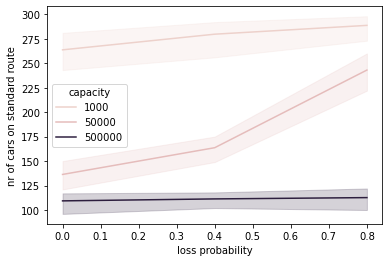

In [70]:

# load data for ad-hoc simulation
df_name = sim_path + sim_name + ".csv"
df = pd.read_csv(df_name, sep = ",")

# plot number of cars on standard route
sb.lineplot(data = df, x = "loss p", y = "standard route", hue = "capacity")
plt.ylabel("nr of cars on standard route")
plt.xlabel("loss probability")
plt.show()

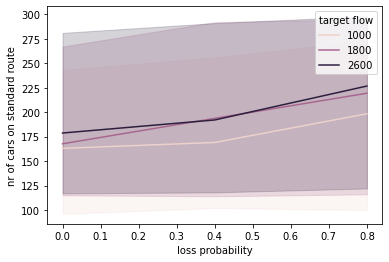

In [71]:
# plot number of cars on standard route
sb.lineplot(data = df, x = "loss p", y = "standard route", hue = "target flow")
plt.ylabel("nr of cars on standard route")
plt.xlabel("loss probability")
plt.show()

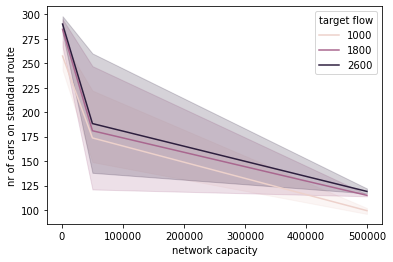

In [72]:
# plot number of cars on standard route
sb.lineplot(data = df, x = "capacity", y = "standard route", hue = "target flow")
plt.ylabel("nr of cars on standard route")
plt.xlabel("network capacity")
plt.show()

The higher the capacity the less cars on the standard route.

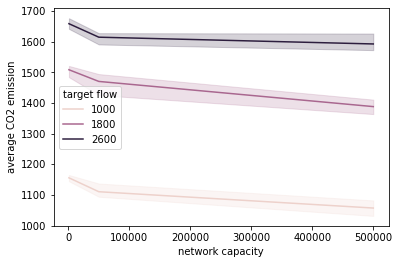

In [73]:
# plot number of cars on standard route
sb.lineplot(data = df, x = "capacity", y = "CO2", hue = "target flow")
plt.ylabel("average CO2 emission")
plt.xlabel("network capacity")
plt.show()

The target flow has a larger impact on the CO2 emission than the network capacity. Presumably, this happens because a low target flow means less traffic and the cars move more uniformly resulting in less CO2 emission. 